<a href="https://colab.research.google.com/github/JuliethLopez/dlaicoursePractica/blob/master/Homework%208.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue. We have saved the zip files is drive, now we're going to unzip them to its use.

In [3]:
#uploaded=files.upload()
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [4]:
!unzip '/gdrive/My Drive/Coursera/Sign Language MNIST/3258_5337_compressed_sign_mnist_test_sign_mnist_test.csv.zip' #julieth

Archive:  /gdrive/My Drive/Coursera/Sign Language MNIST/3258_5337_compressed_sign_mnist_test_sign_mnist_test.csv.zip
  inflating: sign_mnist_test.csv     


In [5]:
!unzip '/gdrive/My Drive/Coursera/Sign Language MNIST/3258_5337_compressed_sign_mnist_train_sign_mnist_train.csv.zip' #julieth

Archive:  /gdrive/My Drive/Coursera/Sign Language MNIST/3258_5337_compressed_sign_mnist_train_sign_mnist_train.csv.zip
  inflating: sign_mnist_train.csv    


In [6]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
      # Your code starts here
        labels = []
        images = []
        training_file = csv.reader(training_file, delimiter=',')
        for i, row in enumerate(training_file):
            if i>0:
                labels.append(row[0])
                image = np.array_split(row[1:785], 28)
                images.append(image)
        labels = np.array(labels).astype('float64')
        images = np.array(images).astype('float64')               
      # Your code ends here
    return images, labels

#path_sign_mnist_train = f"{getcwd()}/../tmp2/sign_mnist_train.csv"
#path_sign_mnist_test = f"{getcwd()}/../tmp2/sign_mnist_test.csv"
training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [7]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis=3)# Your Code Here
testing_images = np.expand_dims(testing_images, axis=3) # Your Code Here

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    # Your Code Here
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

train_generator = train_datagen.flow(
    training_images,
    training_labels)

validation_datagen = ImageDataGenerator(
    # Your Code Here
    rescale = 1./255)

validation_generator = validation_datagen.flow(
    testing_images,
    testing_labels)

# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [10]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    # Your Code Here
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

# Compile Model. 
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])# Your Code Here

# Train the Model
history = model.fit_generator(
    train_generator, epochs=2, validation_data = validation_generator, verbose = 1)# Your Code Here (set 'epochs' = 2)

model.evaluate(testing_images/255, testing_labels, verbose=0)
    
# The output from model.evaluate should be close to:
[6.92426086682151, 0.56609035]


Epoch 1/2
858/858 [==============================] - 9s 11ms/step - loss: 2.7369 - accuracy: 0.1691 - val_loss: 1.8570 - val_accuracy: 0.4077
Epoch 2/2
858/858 [==============================] - 9s 10ms/step - loss: 2.0743 - accuracy: 0.3485 - val_loss: 1.1188 - val_accuracy: 0.6152


[6.92426086682151, 0.56609035]

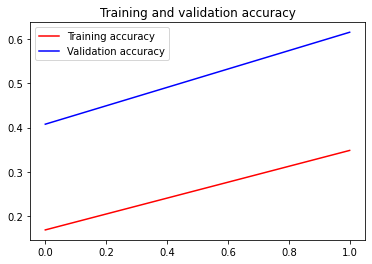

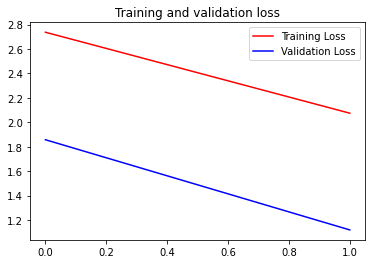

In [11]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history['accuracy']# Your Code Here
val_acc = history.history['val_accuracy']# Your Code Here
loss = history.history['loss']# Your Code Here
val_loss = history.history['val_loss']# Your Code Here

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()